In [1]:

from __future__ import absolute_import, division, print_function, unicode_literals


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#importing dataset

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [7]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

total_train

2000

In [10]:
total_val

1000

In [11]:
#variables to use while pre-processing the dataset and training the network

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
#Loads all the images from directory, normalizing, shuffling, resizing along with augumentation

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5).flow_from_directory(
                                                           batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
                                                                        )

Found 2000 images belonging to 2 classes.


In [15]:
val_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                           batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
                                                                        )

Found 1000 images belonging to 2 classes.


In [16]:
# Visuliasation

sample_training_images, _ = next(train_data_gen)

# The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) 
# where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

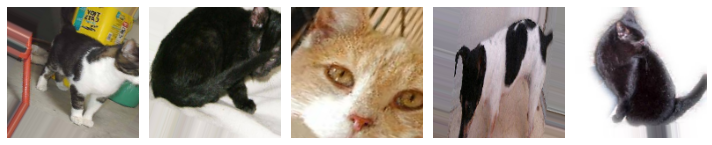

In [18]:
plotImages(sample_training_images[:5])

In [19]:
#Model creation

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [22]:
#Training the model

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 50s 3s/step - loss: 1.2863 - accuracy: 0.4888 - val_loss: 0.6966 - val_accuracy: 0.4944
Epoch 2/15
15/15 [==============================] - 28s 2s/step - loss: 0.6928 - accuracy: 0.4990 - val_loss: 0.6924 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 30s 2s/step - loss: 0.6924 - accuracy: 0.4963 - val_loss: 0.6889 - val_accuracy: 0.5100
Epoch 4/15
15/15 [==============================] - 28s 2s/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6922 - val_accuracy: 0.5056
Epoch 5/15
15/15 [==============================] - 29s 2s/step - loss: 0.6925 - accuracy: 0.5027 - val_loss: 0.6890 - val_accuracy: 0.4978
Epoch 6/15
15/15 [==============================] - 29s 2s/step - loss: 0.6890 - accuracy: 0.4979 - val_loss: 0.6909 - val_accuracy: 0.4955
Epoch 7/15
15/15 [==============================] - 27s 2s/step - loss: 0.6900 - acc

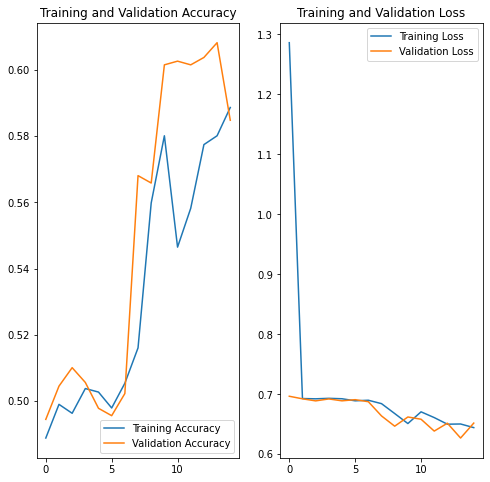

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

